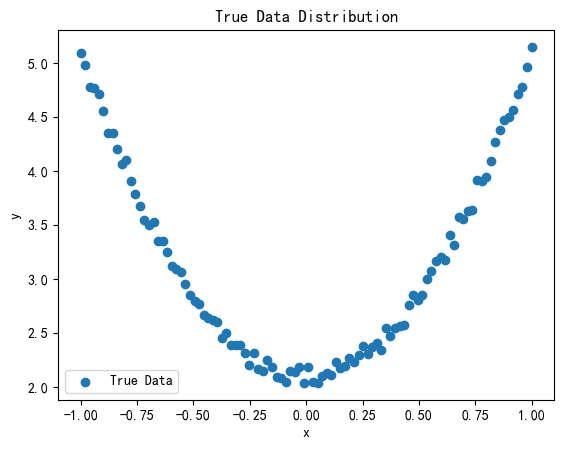

Epoch 50: Weight = 1.8849, Bias = 2.5022


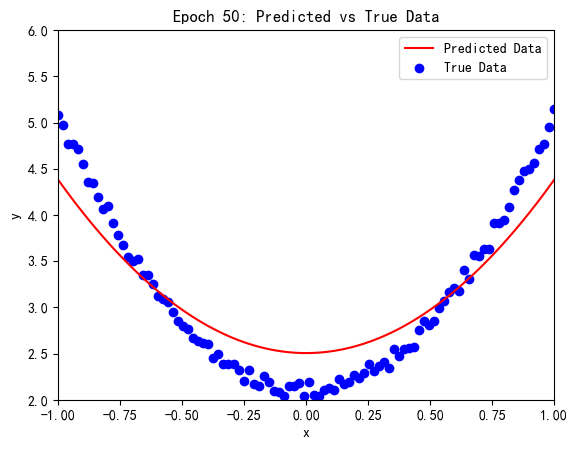

Epoch 100: Weight = 2.2608, Bias = 2.3685


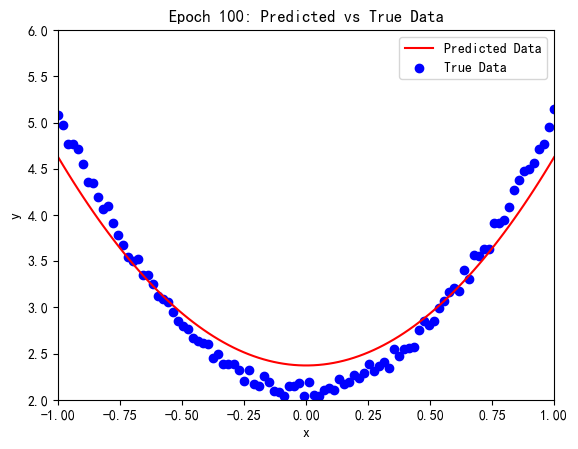

Epoch 150: Weight = 2.5084, Bias = 2.2768


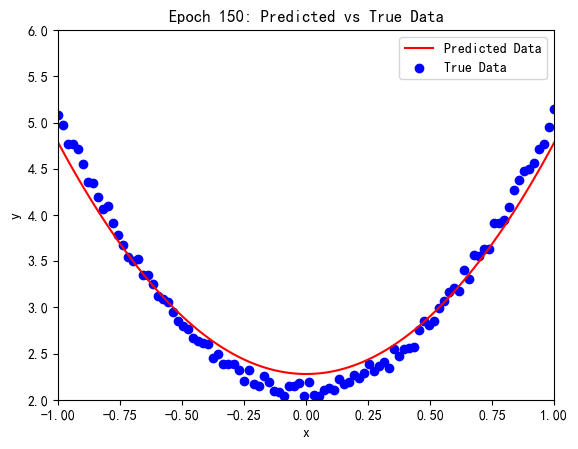

Epoch 200: Weight = 2.6723, Bias = 2.2161


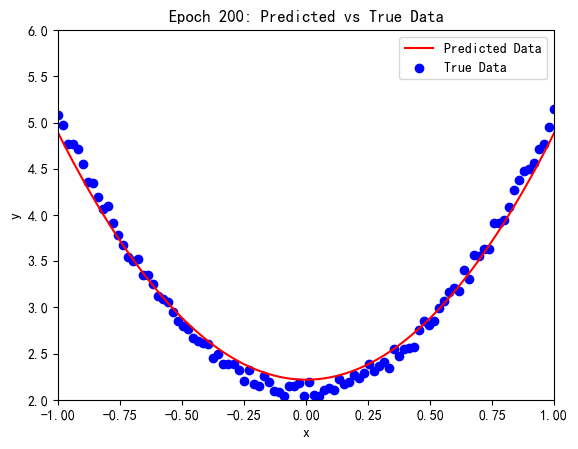

Epoch 250: Weight = 2.7809, Bias = 2.1759


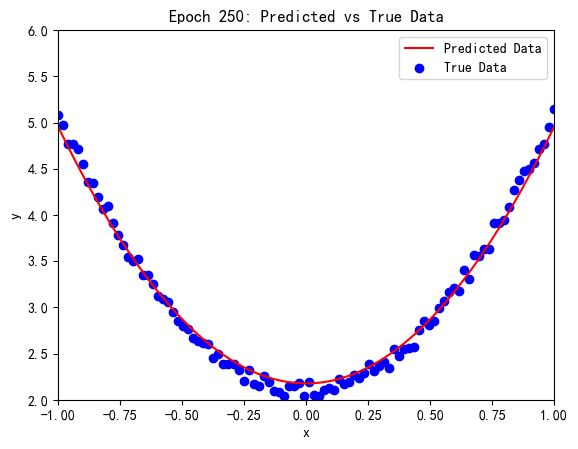

Epoch 300: Weight = 2.8527, Bias = 2.1492


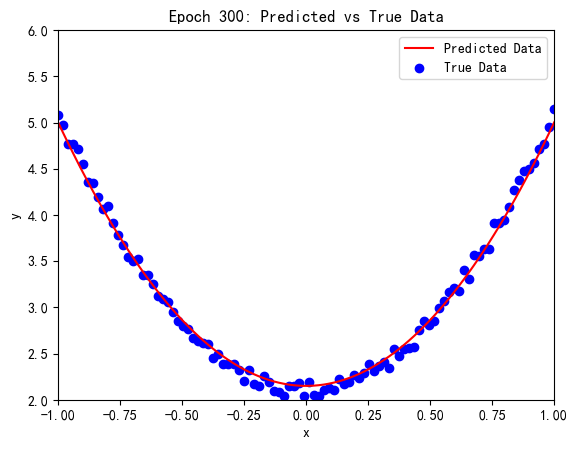

Epoch 350: Weight = 2.9003, Bias = 2.1316


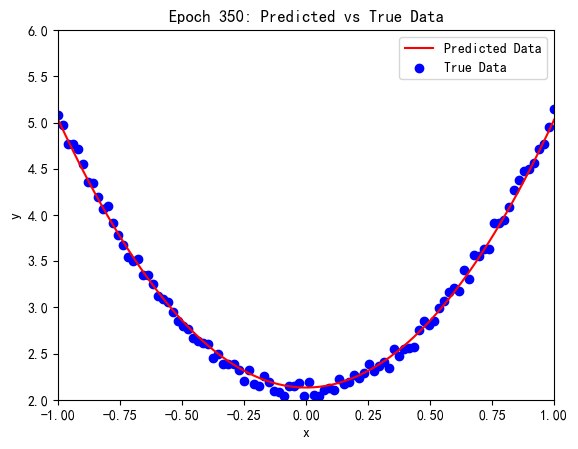

Epoch 400: Weight = 2.9318, Bias = 2.1199


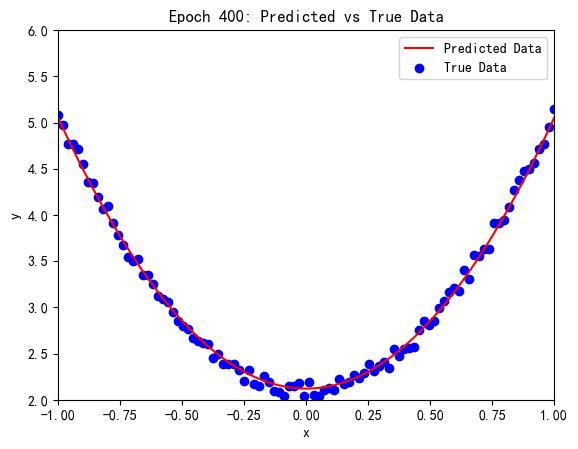

Final Weight: [[2.93179511]]
Final Bias: [[2.11994316]]


In [18]:
import numpy as np
from matplotlib import pyplot as plt

# 生成输入数据 (x) 和目标数据 (y)
np.random.seed(206)  # 设置随机种子，确保结果可重复
x_data = np.linspace(-1, 1, 100).reshape(100, 1)  # 生成从-1到1的100个均匀分布的数据点
y_true = 3 * np.power(x_data, 2) + 2 + 0.2 * np.random.rand(x_data.size).reshape(100, 1)  # 生成目标数据 y，包括一定的随机噪声

# 可视化输入数据和真实数据分布
plt.scatter(x_data, y_true, label='True Data')  # 使用散点图展示真实数据
plt.xlabel('x')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.title('True Data Distribution')  # 图表标题
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 初始化模型参数
weight = np.random.rand(1, 1)  # 初始化权重 weight
bias = np.random.rand(1, 1)  # 初始化偏置 bias

# 设置超参数
learning_rate = 0.001  # 学习率，决定每次参数更新的步长

# 训练配置
epochs = 400  # 总的训练次数为400
plot_frequency = 50  # 每训练50次绘制一次图像

# 进行梯度下降法的训练
for epoch in range(epochs):  # 迭代 400 次
    # 前向传播：根据当前权重和偏置计算预测值
    y_pred = np.power(x_data, 2) * weight + bias  # 使用模型预测 y

    # 反向传播：计算权重和偏置的梯度
    grad_weight = np.sum((y_pred - y_true) * np.power(x_data, 2))  # 计算权重的梯度
    grad_bias = np.sum((y_pred - y_true))  # 计算偏置的梯度

    # 更新参数：使用梯度下降法更新权重和偏置
    weight -= learning_rate * grad_weight  # 更新权重
    bias -= learning_rate * grad_bias  # 更新偏置

    # 控制图像绘制频率，每训练 plot_frequency 次绘制一次图像并输出当前的权重和偏置
    if (epoch + 1) % plot_frequency == 0:  # 每训练50次输出一次图像和参数
        # 输出当前权重和偏置
        print(f'Epoch {epoch + 1}: Weight = {weight[0][0]:.4f}, Bias = {bias[0][0]:.4f}')

        # 绘制当前预测结果与真实数据的对比图
        plt.plot(x_data, y_pred, 'r-', label='Predicted Data')  # 使用红线展示预测结果
        plt.scatter(x_data, y_true, color='blue', marker='o', label='True Data')  # 使用蓝色散点展示真实数据
        plt.xlabel('x')  # 设置 x 轴标签
        plt.ylabel('y')  # 设置 y 轴标签
        plt.title(f'Epoch {epoch + 1}: Predicted vs True Data')  # 图表标题
        plt.xlim(-1, 1)  # 设置 x 轴范围
        plt.ylim(2, 6)  # 设置 y 轴范围
        plt.legend()  # 显示图例
        plt.show()  # 显示图表

# 最终输出训练后的权重和偏置
print('Final Weight:', weight)
print('Final Bias:', bias)


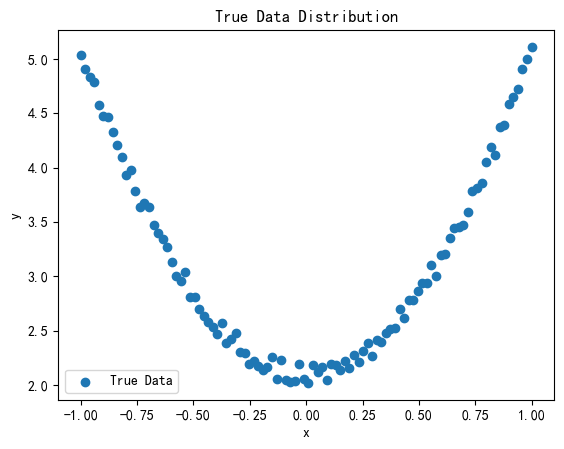

Epoch 50: Weight = 2.1519, Bias = 2.4048


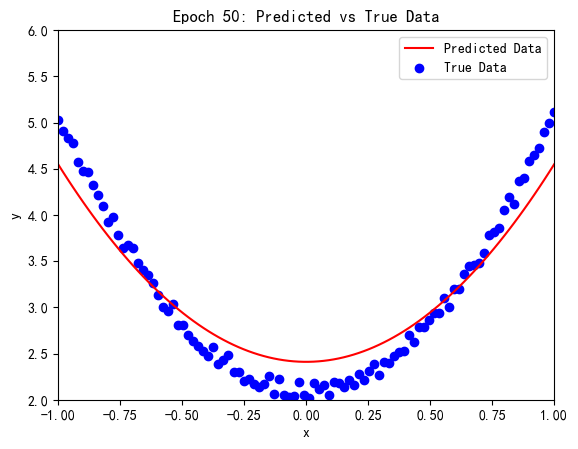

Epoch 100: Weight = 2.6363, Bias = 2.2253


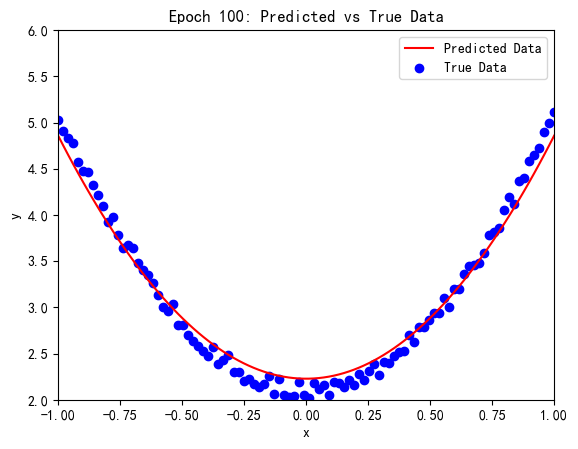

Epoch 150: Weight = 2.8478, Bias = 2.1469


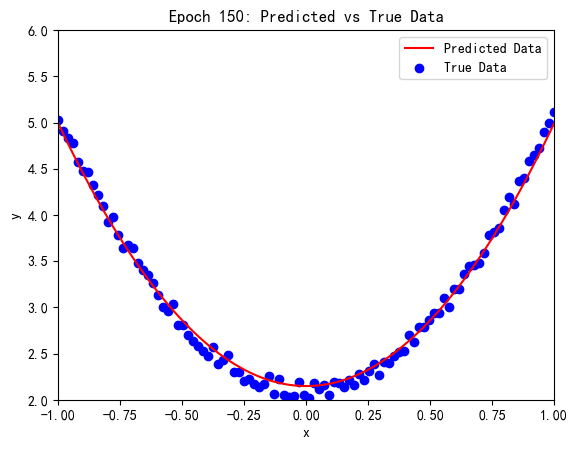

Epoch 200: Weight = 2.9403, Bias = 2.1127


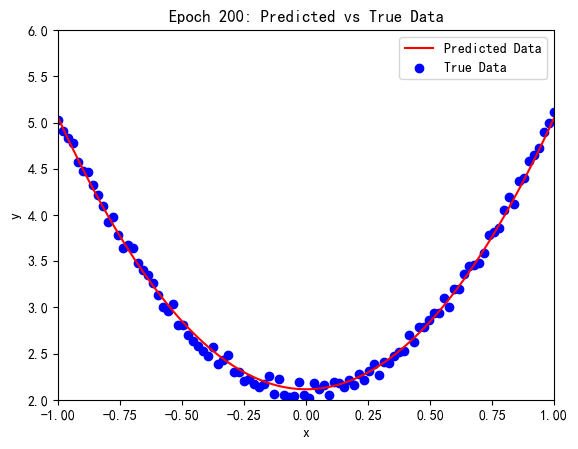

Epoch 250: Weight = 2.9806, Bias = 2.0977


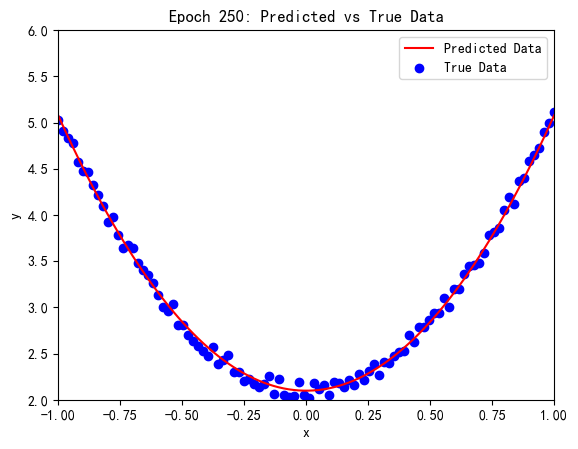

Epoch 300: Weight = 2.9983, Bias = 2.0912


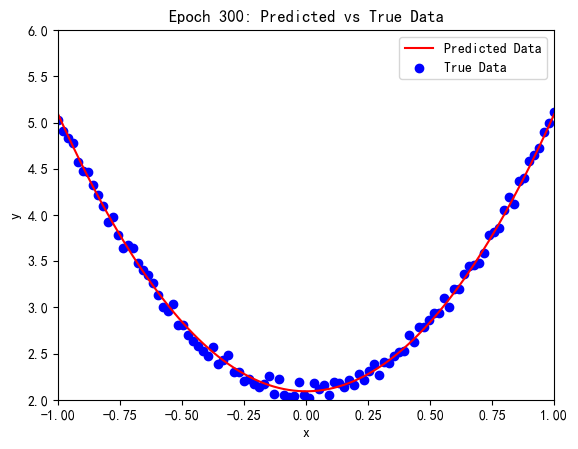

Epoch 350: Weight = 3.0060, Bias = 2.0883


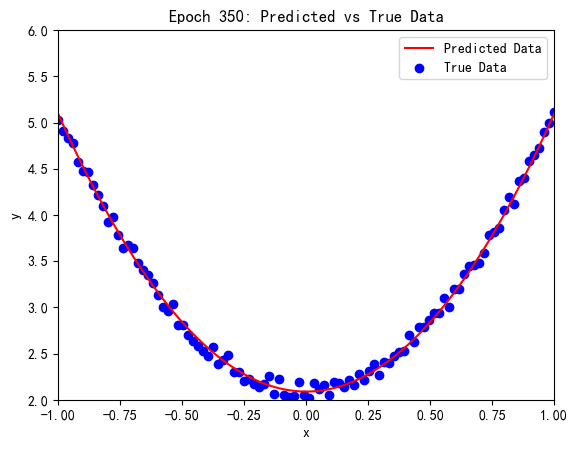

Epoch 400: Weight = 3.0093, Bias = 2.0871


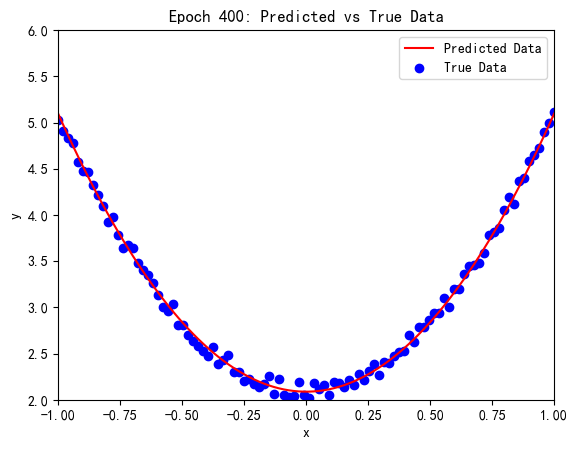

Final Weight: 3.009328842163086
Final Bias: 2.0870931148529053


In [19]:
import numpy as np
import torch
from matplotlib import pyplot as plt

# 生成输入数据 x 和目标数据 y
np.random.seed(66)  # 设置随机种子，确保结果可重复
x_data = np.linspace(-1, 1, 100).reshape(100, 1)  # 生成从 -1 到 1 的 100 个均匀分布的数据点
y_data = 3 * np.power(x_data, 2) + 2 + 0.2 * np.random.rand(x_data.size).reshape(100, 1)  # 生成目标数据 y，并加入一定的随机噪声

# 将 numpy 数组转换为 torch 张量
x_tensor = torch.tensor(x_data, dtype=torch.float32)  # 将 x_data 转换为 float32 类型的 torch 张量
y_tensor = torch.tensor(y_data, dtype=torch.float32)  # 将 y_data 转换为 float32 类型的 torch 张量

# 可视化 x 和 y 数据的分布情况
plt.scatter(x_tensor.numpy(), y_tensor.numpy(), label='True Data')  # 使用散点图展示真实数据
plt.xlabel('x')  # 设置 x 轴标签
plt.ylabel('y')  # 设置 y 轴标签
plt.title('True Data Distribution')  # 图表标题
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 初始化模型参数
weight = torch.zeros(1, 1, requires_grad=True)  # 初始化权重 weight
bias = torch.zeros(1, 1, requires_grad=True)  # 初始化偏置 bias

# 设置超参数
learning_rate = 0.001  # 学习率，决定每次参数更新的步长
epochs = 400  # 总的训练次数为400
plot_frequency = 50  # 每训练50次绘制一次图像

# 进行梯度下降法的训练
for epoch in range(epochs):  # 迭代 400 次
    y_pred = weight * x_tensor ** 2 + bias  # 使用当前权重和偏置计算预测值
    
    loss = torch.sum((y_pred - y_tensor) ** 2)  # 计算均方误差损失
    loss.backward()  # 反向传播计算梯度
    
    # 更新参数：使用梯度下降法更新权重和偏置
    with torch.no_grad():  # 禁用梯度计算以进行参数更新
        weight -= learning_rate * weight.grad  # 更新权重
        bias -= learning_rate * bias.grad  # 更新偏置
        weight.grad.zero_()  # 清零权重的梯度
        bias.grad.zero_()  # 清零偏置的梯度

    # 每隔 plot_frequency 次迭代绘制一次图表
    if (epoch + 1) % plot_frequency == 0:  # 每训练50次输出一次图像和参数
        # 输出当前权重和偏置
        print(f'Epoch {epoch + 1}: Weight = {weight.data.item():.4f}, Bias = {bias.data.item():.4f}')

        # 绘制当前预测结果与真实数据的对比图
        plt.plot(x_tensor.numpy(), y_pred.detach().numpy(), 'r-', label='Predicted Data')  # 使用红线展示预测结果
        plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', marker='o', label='True Data')  # 使用蓝色散点展示真实数据
        plt.xlabel('x')  # 设置 x 轴标签
        plt.ylabel('y')  # 设置 y 轴标签
        plt.title(f'Epoch {epoch + 1}: Predicted vs True Data')  # 图表标题
        plt.xlim(-1, 1)  # 设置 x 轴范围
        plt.ylim(2, 6)  # 设置 y 轴范围
        plt.legend()  # 显示图例
        plt.show()  # 显示图表

# 最终输出训练后的权重和偏置
print('Final Weight:', weight.data.item())
print('Final Bias:', bias.data.item())
